In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
dataset=pd.read_csv("data.csv")



In [4]:
dataset.drop(columns=["id","Unnamed: 32"],inplace=True) ##gereksiz kolonlardan kurtuluyoruz


## data ve target ayırma işlemi

In [4]:
X = dataset.iloc[:,1:]
y= dataset.iloc[:,0]

## Karar ağacıyla sınıflandırma

In [5]:
dtclassifier = DecisionTreeClassifier(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size =
0.2, random_state = 0, stratify = y)
dtclassifier.fit(X_train,y_train)
test_sonuc = dtclassifier.predict(X_test)
print(test_sonuc)
print('Karar ağacı doğruluk değeri: ' + str(accuracy_score(test_sonuc, y_test)))



['B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'B']
Karar ağacı doğruluk değeri: 0.9298245614035088


### Hata matrisi

In [6]:
cm = confusion_matrix(y_test, test_sonuc)
print(cm)

[[65  7]
 [ 1 41]]


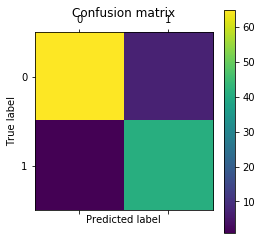

In [7]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## 10 katlı çapraz doğrulama

In [8]:
print(cross_val_score(dtclassifier, X, y, cv=10))


[0.96491228 0.84210526 0.9122807  0.89473684 0.92982456 0.89473684
 0.9122807  0.94736842 0.92982456 0.94642857]


### Ağacı görselleştime

In [9]:
export_graphviz(dtclassifier, out_file='tree.dot', feature_names=X.columns, class_names=["M","B"], filled=True)

## Rasgele Orman ile Sınıflandırma

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfclassifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfclassifier.fit(X_train,y_train)
print ("Rasgele Orman doğruluk değeri: "+ str(rfclassifier.score(X_test, y_test)))

Rasgele Orman doğruluk değeri: 0.9649122807017544


In [11]:
test_sonuc = rfclassifier.predict(X_test)
print(test_sonuc)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']


### Hata Matrisi

In [12]:
cm = confusion_matrix(y_test, test_sonuc)
print(cm)

[[70  1]
 [ 3 40]]


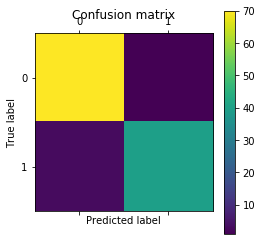

In [13]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 10 katlamalı çapraz doğrulama

In [14]:
print(cross_val_score(rfclassifier, X, y, cv=10))


[0.98245614 0.89473684 0.94736842 0.96491228 0.98245614 0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]


## Tahminleme için veri alımı


In [17]:
def listfloatcevir(list):
    for i in range (len(list)):
        list[i]=float(list[i])
    return list



In [16]:

while (True):
    girdi = input("Veri (virgülle ayırarak)(Çıkmak için 0 giriniz): ")
    if girdi=="0":
        break
    
    veri= girdi.split(",")
    if len(veri)!=30:
        print("doğru veri giriniz")
        continue
    
    veri=np.array(listfloatcevir(veri))
    veri=veri.reshape(1,-1)
    sınıflandırıcı=""
    while (sınıflandırıcı!="R" and sınıflandırıcı!="D"):
        sınıflandırıcı=input("Random Forest (R)\nDecision Tree (D)\n")
        if sınıflandırıcı=="R":
            print("Tahmin: "+str(rfclassifier.predict(veri)))
        elif sınıflandırıcı=="D":
            print("Tahmin: "+str(dtclassifier.predict(veri)))
        else:
            print("Yanlış giriş!")
            
    

Veri (virgülle ayırarak)(Çıkmak için 0 giriniz): 16.65,21.38,110,800.6,0.1121,0.1497,0.1525,0.0917,0.1995,0.0633,0.8068,0.9017,5.455,102.6,0.006048,0.01882,0.02741,0.0113,0.01468,0.002801,26.46,31.56,177,2215,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564
Random Forest (R)
Decision Tree (D)
D
Tahmin: ['M']
Veri (virgülle ayırarak)(Çıkmak için 0 giriniz): 0
